# UFC Retirement Age - Exploratory Data Analysis

## 1. Contents
* [1. Contents](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
* [2. Sourcing and Loading](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [2a. Import relevant libraries](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [2b. Load previously wrangled DataFrame](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [2c. Preliminary exploration of data](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
* [3. Additional Data Wrangling](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [3a. Removing unnecessary columns](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [3b. Adding `win_pct` columns](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [3c. Transforming `finish` column](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [3d. Adding `adj_win` columns](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [3e. Adjusting all difference columns](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [3f. Adding `adj_wins_dif` column](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
* [4._Exploration of Age](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [4a. `age`](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [4b. `age` vs. `Winner`](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [4c. `age` vs. `finish`](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [4d. `age` vs. `fighter`, `finish`](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [4e. `age` vs. `current_lose_streak`, `current_win_streak`](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
 * [4f. `age` vs. `sig_str_landed_bout`, `sig_str_attempted_bout`](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)
* [5._Conclusion](#_UFC_Retirement_Age_-_Exploratory_Data_Analysis)

## 2. Sourcing and Loading

**2a. Import relevant libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle as kg
import pandas as pd
import missingno as msno
import statsmodels.api as sm
import scipy.stats
from matplotlib.lines import Line2D
from kaggle.api.kaggle_api_extended import KaggleApi
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from zipfile import ZipFile
from scipy import stats
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from numpy.random import seed
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

**2b. Load previously wrangled DataFrame**

In [2]:
df = pd.read_csv('df.csv', index_col=0)

**2c. Preliminary exploration of data**

In [3]:
print('SUMMARY INFO')
print(df.info())

SUMMARY INFO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 8773
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        8774 non-null   object 
 1   fighter                     8774 non-null   object 
 2   odds                        8774 non-null   int64  
 3   ev                          8774 non-null   float64
 4   country                     8774 non-null   object 
 5   Winner                      8774 non-null   bool   
 6   title_bout                  8774 non-null   bool   
 7   weight_class                8774 non-null   object 
 8   gender                      8774 non-null   object 
 9   no_of_rounds                8774 non-null   int64  
 10  current_lose_streak         8774 non-null   int64  
 11  current_win_streak          8774 non-null   int64  
 12  draw                        8774 non-null   int64  
 13  avg_SIG_STR_landed  

In [4]:
print('Shape: ' + str(df.shape))

Shape: (8774, 69)


In [5]:
df.head()

,date,fighter,odds,ev,country,Winner,title_bout,weight_class,gender,no_of_rounds,...,sig_str_attempted_bout,sig_str_pct_bout,tot_str_landed_bout,tot_str_attempted_bout,td_landed_bout,td_attempted_bout,td_pct_bout,sub_attempts_bout,pass_bout,rev_bout
0,9/19/2020,Colby Covington,-335,29.850746,USA,True,False,Welterweight,MALE,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/19/2020,Tyron Woodley,260,260.000000,USA,False,False,Welterweight,MALE,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/19/2020,Khamzat Chimaev,-400,25.000000,USA,True,False,Middleweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/19/2020,Gerald Meerschaert,300,300.000000,USA,False,False,Middleweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/19/2020,Johnny Walker,-125,80.000000,USA,True,False,Light Heavyweight,MALE,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Additional Data Wrangling

**3a. Removing unnecessary columns**

In [6]:
df.drop(columns = ['ev', 'empty_arena', 'constant_1', 'no_of_rounds'], inplace=True)

**3b. Adding `win_pct` column**

The `wins`, `draw`, and `losses` columns can be used to create a new win percentage column.

In [7]:
df['win_pct'] = df['wins'] / (df['wins'] + df['draw'] + df['losses'])
df['win_pct'].value_counts(dropna=False)

NaN         1342
1.000000    1235
0.500000    1068
0.000000     811
0.666667     719
            ... 
0.674419       1
0.593750       1
0.807692       1
0.483871       1
0.741935       1
Name: win_pct, Length: 148, dtype: int64

In [8]:
df['win_pct'].fillna(0, inplace=True)
df['win_pct'].isnull().values.any()

False

In [9]:
df.finish.value_counts()

U-DEC         3130
KO/TKO        2614
SUB           1536
S-DEC          876
M-DEC           52
DQ              24
Overturned       4
Name: finish, dtype: int64

**3c. Transforming `finish` column**

The finish column will be more helpful to us as a categorical variable. Not all wins are created equal, and some are more decisive than others. Therefore, each type of finish will be graded on a scale in order of decisiveness. The following values will be used:

* **-4:** Loss by submission/KO/TKO
* **-3:** Loss by unanimous decision
* **-2:** Loss by majority decision
* **-1:** Loss by split decision
* **0:** Disqualification or overturned result
* **1:** Win by split decision
* **2:** Win by majority decision
* **3:** Win by unanimous decision
* **4:** Win by submission/KO/TKO

In [10]:
df.finish.value_counts(dropna=False)

U-DEC         3130
KO/TKO        2614
SUB           1536
S-DEC          876
NaN            538
M-DEC           52
DQ              24
Overturned       4
Name: finish, dtype: int64

In [11]:
for i, row in df.iterrows():
    if (row['Winner'] == False) & ((row['finish'] == 'SUB') | (row['finish'] == 'KO/TKO')):
        df.at[i, 'finish'] = -4
    elif (row['Winner'] == False) & (row['finish'] == 'U-DEC'):
        df.at[i, 'finish'] = -3
    elif (row['Winner'] == False) & (row['finish'] == 'M-DEC'):
        df.at[i, 'finish'] = -2
    elif (row['Winner'] == False) & (row['finish'] == 'S-DEC'):
        df.at[i, 'finish'] = -1
    elif (row['Winner'] == True) & (row['finish'] == 'S-DEC'):
        df.at[i, 'finish'] = 1
    elif (row['Winner'] == True) & (row['finish'] == 'M-DEC'):
        df.at[i, 'finish'] = 2
    elif (row['Winner'] == True) & (row['finish'] == 'U-DEC'):
        df.at[i, 'finish'] = 3
    elif (row['Winner'] == True) & ((row['finish'] == 'SUB') | (row['finish'] == 'KO/TKO')):
        df.at[i, 'finish'] = 4
    elif pd.isnull(row['finish']):
        df.at[i, 'finish'] = row['finish']
    else:
        df.at[i, 'finish'] = 0
        
df['finish'].value_counts()

-4    2075
 4    2075
-3    1565
 3    1565
-1     438
 1     438
 0      28
-2      26
 2      26
Name: finish, dtype: int64

**3d. Adding `adj_wins` column**

With a new scale created for `finish`, we can now apply it on the `wins` column to create a new adjusted columns.

In [12]:
adj_wins = []
for i, row in df.iterrows():
    adj_win = ((row['win_by_Decision_Split'] * 1) + 
               (row['win_by_Decision_Majority'] * 2) + 
               (row['win_by_Decision_Unanimous'] * 3) + 
               (row['win_by_KO/TKO'] * 4) + 
               (row['win_by_Submission'] * 4) + 
               (row['win_by_TKO_Doctor_Stoppage'] * 4))
    adj_wins.append(adj_win)

adj_wins[:10]

[34, 54, 8, 24, 12, 12, 9, 15, 16, 16]

In [13]:
df['adj_wins'] = adj_wins
df[['adj_wins', 'win_by_Decision_Split', 'win_by_Decision_Majority', 'win_by_Decision_Unanimous', 'win_by_KO/TKO',
    'win_by_Submission', 'win_by_TKO_Doctor_Stoppage']].head()

,adj_wins,win_by_Decision_Split,win_by_Decision_Majority,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage
0,34,0,0,6,2,2,0
1,54,3,1,3,6,4,0
2,8,0,0,0,1,1,0
3,24,0,0,0,1,5,0
4,12,0,0,0,3,0,0


**3e. Adjusting all difference columns**

Due to the nature of the previous data wrangling project, all of the difference columns have positive values. This is inaccurate, as one fighter should have a positive difference and the other one should have a negative difference. In order to do this, I will create an entirely new DataFrame to store the correct differences, then replace the original difference columns with the values in this new DataFrame.

In [14]:
df[[column for column in df.columns if (('td' in column) | ('TD' in column))]]

,avg_TD_landed,avg_TD_pct,avg_td_dif,td_landed_bout,td_attempted_bout,td_pct_bout
0,4.910000,0.510,-3.800000,NaN,NaN,NaN
1,1.110000,0.390,-3.800000,NaN,NaN,NaN
2,4.810000,0.750,-2.470000,NaN,NaN,NaN
3,2.340000,0.430,-2.470000,NaN,NaN,NaN
4,0.430000,1.000,0.700000,NaN,NaN,NaN
...,...,...,...,...,...,...
8769,1.000000,1.000,1.000000,0.0,2.0,0.00
8770,3.500000,0.520,-3.500000,6.0,10.0,0.60
8771,NaN,NaN,-3.500000,0.0,0.0,0.00
8772,0.833333,0.145,0.833333,2.0,3.0,0.66


In [15]:
dif = pd.DataFrame(columns=['current_lose_streak_dif', 'current_win_streak_dif', 'longest_win_streak_dif', 'wins_dif',
                            'losses_dif', 'total_rounds_fought_dif', 'total_title_bouts_dif', 'win_by_Submission_dif',
                            'Height_cms_dif', 'Reach_cms_dif', 'age_dif', 'avg_SIG_STR_landed_dif',
                            'avg_SUB_ATT_dif', 'avg_TD_landed_dif'])
dif.columns

Index(['current_lose_streak_dif', 'current_win_streak_dif',
       'longest_win_streak_dif', 'wins_dif', 'losses_dif',
       'total_rounds_fought_dif', 'total_title_bouts_dif',
       'win_by_Submission_dif', 'Height_cms_dif', 'Reach_cms_dif', 'age_dif',
       'avg_SIG_STR_landed_dif', 'avg_SUB_ATT_dif', 'avg_TD_landed_dif'],
      dtype='object')

In [16]:
for number in range(8774):
    dif.loc[number] = df.at[1177, 'avg_TD_landed']
    
dif.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773],
           dtype='int64', length=8774)

In [17]:
for column in dif.columns:
    new_dif = []
    for i, row in df.iterrows():
        if i % 2 == 0:
            new_dif.append(row[column[:-4]] - df.at[(i + 1), column[:-4]])
        elif i % 2 != 0:
            new_dif.append(row[column[:-4]] - df.at[(i - 1), column[:-4]])
    dif[column] = new_dif
    
dif.head()

,current_lose_streak_dif,current_win_streak_dif,longest_win_streak_dif,wins_dif,losses_dif,total_rounds_fought_dif,total_title_bouts_dif,win_by_Submission_dif,Height_cms_dif,Reach_cms_dif,age_dif,avg_SIG_STR_landed_dif,avg_SUB_ATT_dif,avg_TD_landed_dif
0,-1,0,-1,-7,-3,-25,-5,-2,5.08,-5.08,-6,1.79,-0.2,3.80
1,1,0,1,7,3,25,5,2,-5.08,5.08,6,-1.79,0.2,-3.80
2,-1,2,0,-4,-5,-19,0,-4,2.54,-5.08,-6,5.57,1.5,2.47
3,1,-2,0,4,5,19,0,4,-2.54,5.08,6,-5.57,-1.5,-2.47
4,2,-4,-1,-1,2,-2,0,-1,2.54,7.62,-1,0.69,-0.6,-0.70


In [18]:
new_ko_dif = []
for i, row in df.iterrows():
    if i % 2 == 0:
        new_ko_dif.append((row['win_by_KO/TKO'] + row['win_by_TKO_Doctor_Stoppage']) -
                       (df.at[(i + 1), 'win_by_KO/TKO'] + df.at[(i + 1), 'win_by_TKO_Doctor_Stoppage']))
    elif i % 2 != 0:
        new_ko_dif.append((row['win_by_KO/TKO'] + row['win_by_TKO_Doctor_Stoppage']) -
                       (df.at[(i - 1), 'win_by_KO/TKO'] + df.at[(i - 1), 'win_by_TKO_Doctor_Stoppage']))
dif['ko_dif'] = new_ko_dif
dif['ko_dif'].head(10)

0   -4
1    4
2    0
3    0
4    2
5   -2
6    0
7    0
8    0
9    0
Name: ko_dif, dtype: int64

In [19]:
old_difs = [column for column in df.loc[:, 'lose_streak_dif':'avg_td_dif'].columns]
df.drop(old_difs, axis=1, inplace=True)

In [20]:
[result for result in old_difs if result in df.columns]

[]

In [21]:
df = pd.concat([df, dif], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 8773
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        8774 non-null   object 
 1   fighter                     8774 non-null   object 
 2   odds                        8774 non-null   int64  
 3   country                     8774 non-null   object 
 4   Winner                      8774 non-null   bool   
 5   title_bout                  8774 non-null   bool   
 6   weight_class                8774 non-null   object 
 7   gender                      8774 non-null   object 
 8   current_lose_streak         8774 non-null   int64  
 9   current_win_streak          8774 non-null   int64  
 10  draw                        8774 non-null   int64  
 11  avg_SIG_STR_landed          7389 non-null   float64
 12  avg_SIG_STR_pct             7652 non-null   float64
 13  avg_SUB_ATT                 7585 

**3f. Adding `adj_wins_dif` column**

Now that there's an `adj_wins` column, we might as well add an `adj_wins_dif` column to all the other difference columns.

In [23]:
adj_wins_dif = []
for i, row in df.iterrows():
    if i % 2 == 0:
        adj_wins_dif.append(row['adj_wins'] - df.at[(i + 1), 'adj_wins'])
    elif i % 2 != 0:
        adj_wins_dif.append(row['adj_wins'] - df.at[(i - 1), 'adj_wins'])

adj_wins_dif[:10]

[-20, 20, -16, 16, 0, 0, -6, 6, 0, 0]

In [24]:
df['adj_wins_dif'] = adj_wins_dif
df[['adj_wins_dif', 'adj_wins', ]].head()

,adj_wins_dif,adj_wins
0,-20,34
1,20,54
2,-16,8
3,16,24
4,0,12


**3g. Change format of `date` column to DateTime**

In [25]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.dtypes[0:1]

date    datetime64[ns]
dtype: object

## 4. Exploration of `age`

Since the focus of this project is on the relationship between age and fight performance, I will plot the relationship between `age` and other variables.

**4a. `age`**

An examination of the `age` variable is a natural first step. 

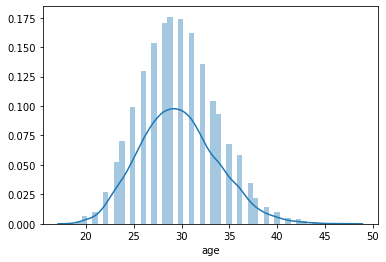

In [26]:
sns.distplot(df['age'])

In [27]:
(np.std(df.age) * 2 + np.mean(df.age)), (np.mean(df.age) - (np.std(df.age) * 2))

(37.78493307682125, 21.595737085020556)

The distribution of fighter ages is approximately normal, with ~95% of fighter ages between 37.8 and 21.6. Based on this distribution, fighters over the age of 38 could be considered old.

count    8774.000000
mean       29.690335
std         4.047530
min        19.000000
25%        27.000000
50%        29.000000
75%        32.000000
max        47.000000
Name: age, dtype: float64

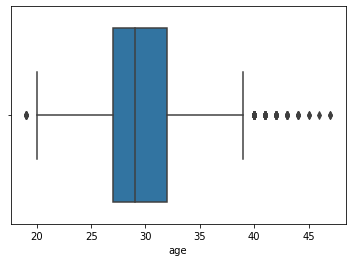

In [28]:
sns.boxplot(data=df, x='age')
df.age.describe()

**4b. `age` vs. `Winner`**

These will be the most obvious variable pair to explore.

,count,mean,std,min,25%,50%,75%,max
Winner,,,,,,,,
False,4387.0,30.061545,4.106743,19.0,27.0,30.0,33.0,47.0
True,4387.0,29.319125,3.953192,19.0,27.0,29.0,32.0,47.0


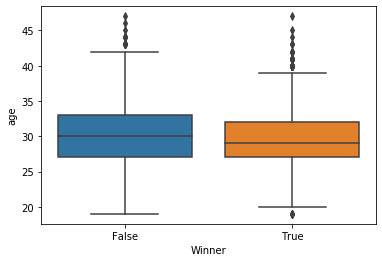

In [29]:
sns.boxplot(x='Winner', y='age', data=df)
df.groupby('Winner')['age'].describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D184945508>]],
      dtype=object)

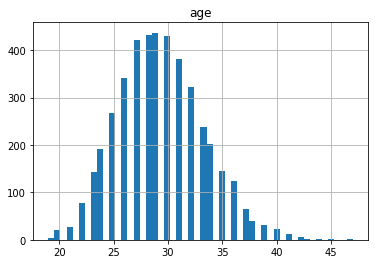

In [30]:
df[df['Winner'] == True].hist('age', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D1847CD488>]],
      dtype=object)

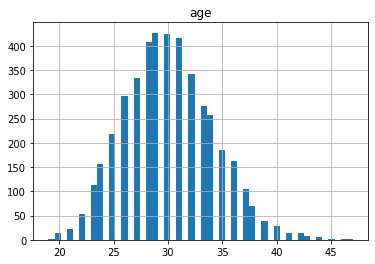

In [31]:
df[df['Winner'] == False].hist('age', bins=50)

The mean age of fight losers and winners seems to be very similar. I will conduct a paired T-test on the mean of these 2 samples with a significance level of 0.05. The null hypothesis is that the true mean age difference between these 2 groups is 0.

In [32]:
winners = df.age[df.Winner == True]
winners.head()

0    32
2    26
4    28
6    27
8    27
Name: age, dtype: int64

In [33]:
losers = df.age[df.Winner == False]
losers.head()

1    38
3    32
5    29
7    35
9    29
Name: age, dtype: int64

In [34]:
scipy.stats.ttest_rel(winners, losers)

Ttest_relResult(statistic=-9.626870846324419, pvalue=1.0083174769196263e-21)

With such a low p-value, the chance that these 2 groups have the same mean is very small. As such, there is enough evidence for us to reject the null hypothesis that the mean of fighter ages between winners and losers is the same.

**4c. `age` vs. `finish`**

,count,mean,std,min,25%,50%,75%,max
finish,,,,,,,,
-4,2075.0,30.286747,4.215528,19.0,27.00,30.0,33.00,47.0
-3,1565.0,29.918211,3.960445,20.0,27.00,30.0,32.00,46.0
-2,26.0,30.538462,4.835128,23.0,26.25,30.0,34.00,39.0
-1,438.0,29.744292,3.954362,20.0,27.00,30.0,32.00,44.0
0,28.0,30.928571,3.609951,23.0,29.75,31.0,32.25,40.0
1,438.0,29.563927,3.663073,20.0,27.00,29.5,32.00,42.0
2,26.0,30.384615,4.308846,23.0,27.25,30.5,33.00,38.0
3,1565.0,29.293291,3.777235,20.0,27.00,29.0,32.00,41.0
4,2075.0,29.298795,4.140886,19.0,26.00,29.0,32.00,47.0


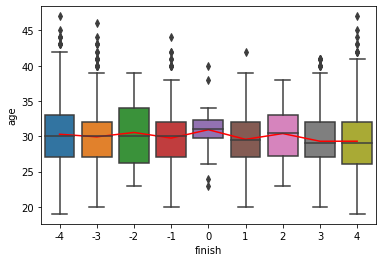

In [35]:
line = df.groupby('finish')['age'].mean()
ax = sns.boxplot(x='finish', y='age', data=df)
ax = sns.lineplot(x=(line.index+4), y=line.values, color='red')
df.groupby('finish')['age'].describe()

It looks like there is a slight increase in age as fight outcomes become more negative. This is to be expected, given our analysis of the relationship between `age` and `Winner`. 

**4d. `age` vs. `fighter`, `finish`**

The UFC boasts many fighters who have fought past the age of 38. It would be useful to find these fighters with the most fights in our dataset and plot their fight finishes against their age.

In [36]:
old = df[df['age'] >= 38]['fighter'].value_counts()[:10]

In [37]:
vets = df[df['age'] >= 38]['fighter'].value_counts()[:10]
vets

Mark Hunt             12
Aleksei Oleinik       11
Dan Henderson         11
Demian Maia           11
Anthony Perosh         9
Andrei Arlovski        9
Fabricio Werdum        8
Francisco Trinaldo     8
Yoel Romero            8
Marion Reneau          8
Name: fighter, dtype: int64

In [38]:
vets_df = df[df.fighter.isin(vets.index)]
vets_df.shape

(150, 68)

In [39]:
vets_df['finish'] = pd.to_numeric(vets_df['finish'], errors='coerce')
vets_df = vets_df.dropna(subset=['finish'])
vets_df.loc[:, 'finish'] = vets_df.loc[:, 'finish'].astype(int)
vets_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(147, 68)

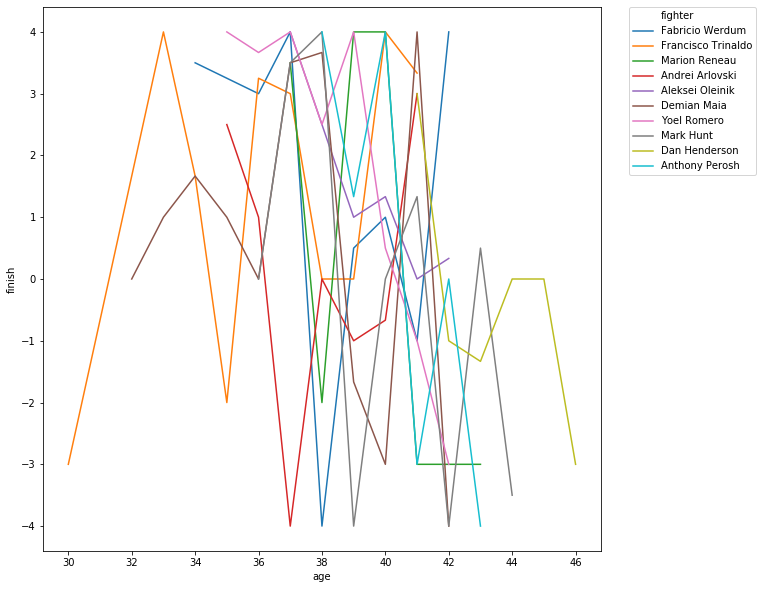

In [40]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.lineplot(data=vets_df, x='age', y='finish', hue='fighter', ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks like most of the seasoned fighters in the UFC lost their last fight. 

In [41]:
df[(~df['age'].isnull()) & (~df['finish'].isnull())]

,date,fighter,odds,country,Winner,title_bout,weight_class,gender,current_lose_streak,current_win_streak,...,total_title_bouts_dif,win_by_Submission_dif,Height_cms_dif,Reach_cms_dif,age_dif,avg_SIG_STR_landed_dif,avg_SUB_ATT_dif,avg_TD_landed_dif,ko_dif,adj_wins_dif
64,2020-08-29,Anthony Smith,225,USA,False,False,Light Heavyweight,MALE,1,0,...,1,3,0.00,-5.08,4,-1.98,0.400000,-0.750000,4,25
65,2020-08-29,Aleksandar Rakic,-278,USA,True,False,Light Heavyweight,MALE,1,0,...,-1,-3,0.00,5.08,-4,1.98,-0.400000,0.750000,-4,-25
66,2020-08-29,Robbie Lawler,200,USA,False,False,Welterweight,MALE,3,0,...,6,-1,-10.16,-15.24,5,-0.38,-0.300000,-1.840000,7,11
67,2020-08-29,Neil Magny,-250,USA,True,False,Welterweight,MALE,0,2,...,-6,1,10.16,15.24,-5,0.38,0.300000,1.840000,-7,-11
68,2020-08-29,Ji Yeon Kim,230,USA,False,False,Women's Flyweight,FEMALE,0,1,...,0,0,5.08,15.24,3,-0.76,-0.600000,-0.190000,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,2010-03-21,Chase Gormley,220,USA,False,False,Heavyweight,MALE,1,0,...,-1,0,-2.54,-2.12,0,-4.00,1.000000,1.000000,0,0
8770,2010-03-21,Mike Pierce,-420,USA,True,False,Welterweight,MALE,1,0,...,0,0,-10.16,-7.62,-5,NaN,NaN,NaN,0,3
8771,2010-03-21,Julio Paulino,335,USA,False,False,Welterweight,MALE,0,0,...,0,0,10.16,7.62,5,NaN,NaN,NaN,0,-3
8772,2010-03-21,Eric Schafer,140,USA,False,False,Light Heavyweight,MALE,1,0,...,0,2,10.16,10.16,-2,-16.00,0.666667,-0.833333,0,5


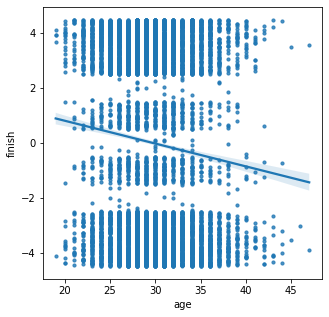

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(data=df, x='age', y='finish', scatter_kws={'s':10}, y_jitter=0.5)

The downward trend becomes even more obvious when we fit a linear regression model to the data. 

**4e. `age` vs. `current_lose_streak`, `current_win_streak`**

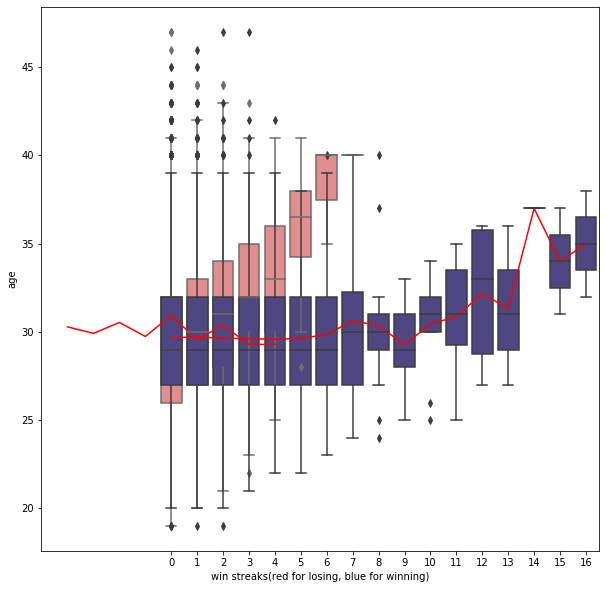

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
line1 = df.groupby('current_lose_streak')['age'].mean()
line2 = df.groupby('current_win_streak')['age'].mean()
ax = sns.boxplot(x='current_lose_streak', y='age', data=df, color='lightcoral')
ax = sns.lineplot(x=(line.index), y=line.values, color='red')
ax = sns.boxplot(x='current_win_streak', y='age', data=df, color='darkslateblue')
ax = sns.lineplot(x=(line2.index), y=line2.values, color='red')
ax = ax.set(xlabel='win streaks(red for losing, blue for winning)')

There is a noticeable upward trend in both win and lose streaks as fighter ages increase. However, it looks like the age of the maximum win streak is lower than the age of the maximum lose streak.

In [44]:
df.groupby('current_win_streak')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
current_win_streak,,,,,,,,
0,4692.0,29.679028,4.125577,19.0,27.00,29.0,32.00,45.0
1,2097.0,29.713400,4.006600,19.0,27.00,29.0,32.00,46.0
2,958.0,29.647182,3.988587,19.0,27.00,29.0,32.00,47.0
3,515.0,29.619417,3.893376,21.0,27.00,29.0,32.00,47.0
4,242.0,29.582645,3.704235,22.0,27.00,29.0,32.00,42.0
5,109.0,29.642202,3.673032,22.0,27.00,29.0,32.00,38.0
6,66.0,29.848485,3.875931,23.0,27.00,29.0,32.00,40.0
7,36.0,30.638889,4.113759,24.0,27.00,30.0,32.25,40.0
8,17.0,30.352941,3.839615,24.0,29.00,30.0,31.00,40.0


In [45]:
df.groupby('current_lose_streak')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
current_lose_streak,,,,,,,,
0,5425.0,29.202765,3.968417,19.0,26.00,29.0,32.0,47.0
1,2344.0,30.059300,3.994595,20.0,27.00,30.0,33.0,45.0
2,745.0,31.081879,3.959473,21.0,28.00,31.0,34.0,44.0
3,193.0,32.067358,3.864990,22.0,30.00,32.0,35.0,43.0
4,53.0,33.245283,3.699822,25.0,30.00,33.0,36.0,41.0
5,10.0,35.700000,4.137901,28.0,34.25,36.5,38.0,41.0
6,3.0,38.333333,2.886751,35.0,37.50,40.0,40.0,40.0
7,1.0,40.000000,NaN,40.0,40.00,40.0,40.0,40.0


As we noticed in the boxplot, the mean age for the maximum lose streak is 40, while the mean age for the maximum win streak is 35. This is a noticeable 5 year difference. 

**4f. `age` vs. `sig_str_landed_bout`, `sig_str_attempted_bout`**

For the average UFC viewer, the most exciting fights are the ones where fighters wage all-out war against each other, a flurry of punches and kicks coming from both sides. Winning fights is not the only criterion for the UFC to keep a fighter on their roster; just as important, if not more important, is a fighter's ability to entertain. Many fighters have stayed on with the UFC despite a significant number of losses in their record because they were willing to throw "finishers," huge fight-ending moves that are exciting to watch but more vulnerable to counters. We will now investigate the relationship between `age` and `sig_str_landed_bout` and `sig_str_attempted_bout`, to see if fighters attempt and land less significant strikes as they age.

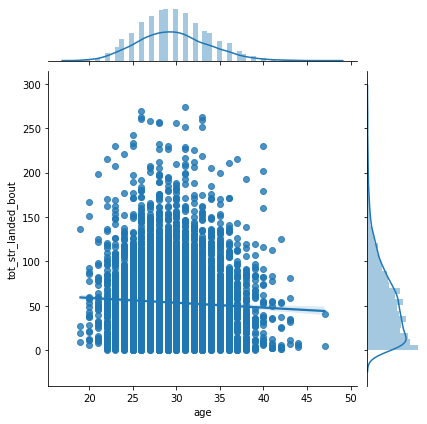

In [46]:
sns.jointplot(data=df, x='age', y='tot_str_landed_bout', kind='reg')

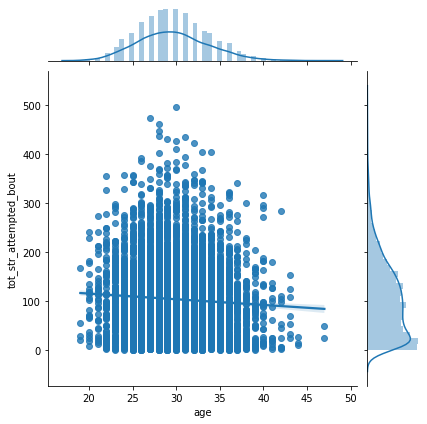

In [47]:
sns.jointplot(data=df, x='age', y='tot_str_attempted_bout', kind='reg')

`age` seems to be negatively correlated with `sig_tot_attempted_bout` and `sig_tot_landed_bout`, but the correlation does not seem that strong.

## 5. Conclusion

We have gleaned some useful information from this Exploratory Data Analysis about the `age` variable and its relationship with other variables. `age` by itself is a nearly normal distribution, with a mean of 29.7 and 95% of ages lying between 37.8 and 21.6, making any age over 38 considered old. When fighters were separated by whether they had won or lost a fight, the p-value of the difference of the mean ages in these 2 groups was extremely low, providing evidence to reject the null hypothesis that these 2 groups share the same mean age. Additionally, there was a slight decrease in `finish` scores as `age` increased. Most older fighters (over the age of 38) lost their last fight. When all `fighter`s were plotted against `age`, the downward trend became more pronounced. Win and lose streaks both increased as `age` increased, but win streaks stopped increasing at a lower age than lose streaks. There was also a weak negative correlation between `age` and total strikes attempted and landed. 

In [48]:
df.to_csv('df.csv')